In [ ]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error

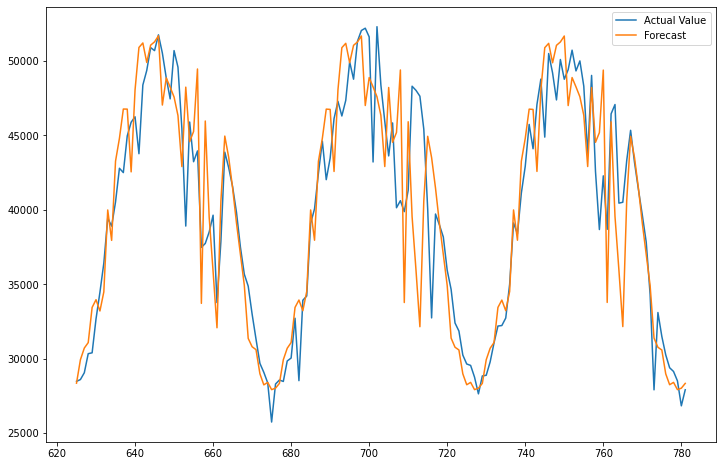

In [3]:
#Assume df contains the preprocessed daily/weekly data.
#df['GHI '] has the GHI values
#df['Code '] has the coded(starting from 0) day/week values.

df = pd.read_csv('D:\BITS PILANI\Applied Statistical Methods\Assignment - 2\weeklydata.csv')
X = df['GHI']. values

#Calculating size of training set.
size = int(len(X) * 0.8)

#Getting the test set.
test = X[size:len(X)]

#Setting hyperparameters.
p,d,q, =1,0,1
m = 52
P,D,Q = 1,1,1

#Creating model.
model = sm.tsa.statespace.SARIMAX(X[0: size], order=(p,d,q), seasonal_order =(P, D, Q, m))

#Fitting model.
results = model.fit()

#Forecasting
predictions = results.forecast(len(test))

plt.figure(figsize =(12, 8))
plt.plot(df['Week'][size:], X[size:], label='Actual Value')
plt.plot(range(size , len(X)), predictions , label='Forecast ')
plt.legend ()
plt.show()


In [ ]:
print('MSE =', mean_squared_error(test, predictions))
print('Mape =', mean_absolute_percentage_error(test,predictions))
print('mae =', mean_absolute_error(test,predictions))